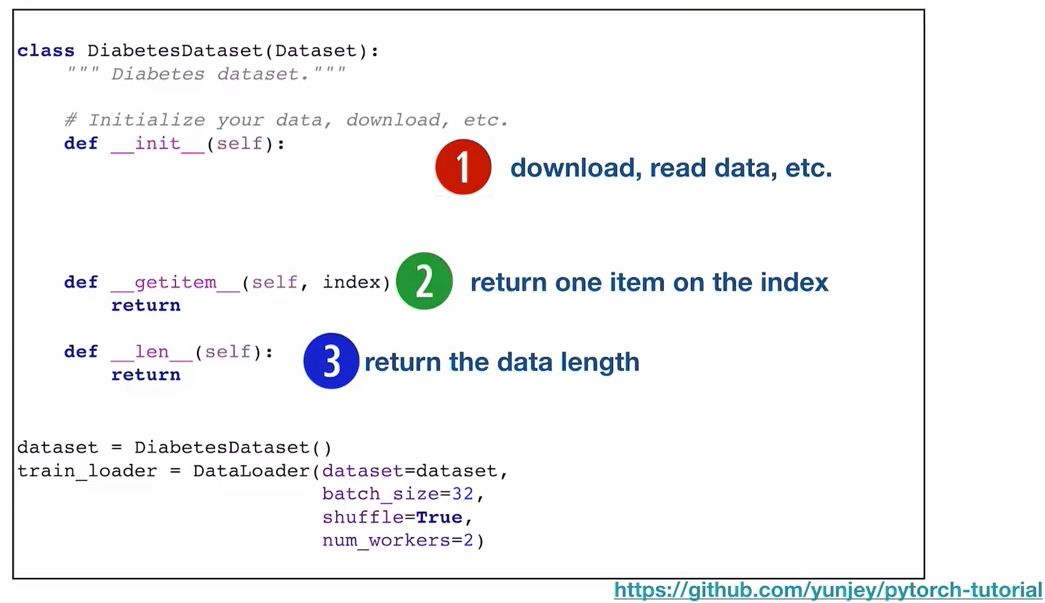

In [4]:
import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [11]:
class DiabetesDataset(Dataset):
    
    def __init__(self):
        xy = np.loadtxt('./data/diabetes.csv.gz', delimiter = ',', dtype = np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, 0:-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len
        

In [13]:
dataset = DiabetesDataset() # 인스턴스.
train_loader = DataLoader(dataset = dataset, # each epoch 마다 사용
                         batch_size = 32,
                         shuffle = True, 
                         num_workers = 2)

In [15]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(8, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l3 = torch.nn.Linear(4, 1)
        
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        out3 = self.sigmoid(self.l3(out2))
        return y_pred

In [16]:
model = Model()

criterion = torch.nn.BCELoss(size_average = True)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

C:\Users\82104\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


- epoch : 한번 **모든** Train data에 대해서 forward, backward pass 를 진행한 상태를 의미
- batch_size : forward와 backward를 한 번에 얼만큼의 데이터씩 진행할 것인지 그 사이즈를 의미
- iterations : batch_size 단위로 몇 번 forward, backward를 진행했는지 그 수를 의미

In [17]:
for epoch in range(2):
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        inputs, labels = Variable(inputs), Variable(labels)
        
        y_pred = model(inputs)
        
        loss = criterion(y_pred, labels)
        print(epoch, i, loss.data)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

RuntimeError: DataLoader worker (pid(s) 9252, 8304) exited unexpectedly

In [20]:

import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader
class DiabetesDataset(Dataset):
    
    def __init__(self):
        xy=np.loadtxt('./data/diabetes.csv.gz',delimiter=',',dtype=np.float32)
        self.len=xy.shape[0]
        self.x_data=torch.from_numpy(xy[:,0:-1])
        self.y_data=torch.from_numpy(xy[:,[-1]])
        
    def __getitem__(self,index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len
    
dataset = DiabetesDataset()
train_loader = DataLoader(dataset = dataset,
                         batch_size=32,
                         shuffle=True,
                         num_workers=0)
class MyModel(torch.nn.Module):
    
    def __init__(self):
        super(MyModel,self).__init__()
        self.l1=torch.nn.Linear(8,4)
        self.l2=torch.nn.Linear(4,6)
        self.l3=torch.nn.Linear(6,1)
        
        self.sigmoid=torch.nn.Sigmoid()
        
    def forward(self,x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred
model = MyModel()

criterion = torch.nn.BCELoss(size_average = True)
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
# Training loop
for epoch in range(2):
    for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(inputs)

        # Compute and print loss
        loss = criterion(y_pred, labels)
        print(epoch, i, loss.data)

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


0 0 tensor(0.6783)
0 1 tensor(0.6636)
0 2 tensor(0.6913)
0 3 tensor(0.6635)
0 4 tensor(0.6854)
0 5 tensor(0.6649)
0 6 tensor(0.6924)
0 7 tensor(0.6409)
0 8 tensor(0.6940)
0 9 tensor(0.6336)
0 10 tensor(0.7057)
0 11 tensor(0.6574)
0 12 tensor(0.6456)
0 13 tensor(0.6640)
0 14 tensor(0.6519)
0 15 tensor(0.6040)
0 16 tensor(0.6490)
0 17 tensor(0.6482)
0 18 tensor(0.6477)
0 19 tensor(0.6033)
0 20 tensor(0.6457)
0 21 tensor(0.6931)
0 22 tensor(0.6311)
0 23 tensor(0.6254)
1 0 tensor(0.6286)
1 1 tensor(0.6957)
1 2 tensor(0.6446)
1 3 tensor(0.5785)
1 4 tensor(0.5897)
1 5 tensor(0.6251)
1 6 tensor(0.6239)
1 7 tensor(0.6817)
1 8 tensor(0.7575)
1 9 tensor(0.5567)
1 10 tensor(0.6245)
1 11 tensor(0.6427)
1 12 tensor(0.6049)
1 13 tensor(0.6830)
1 14 tensor(0.7214)
1 15 tensor(0.6627)
1 16 tensor(0.6621)
1 17 tensor(0.6985)
1 18 tensor(0.6795)
1 19 tensor(0.7127)
1 20 tensor(0.6123)
1 21 tensor(0.6102)
1 22 tensor(0.6789)
1 23 tensor(0.5015)
